## Exercise Set 1 for OSM 

### Dynamic Programming with John Stachurski

This notebook contains the first set of exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

Consider the data

In [3]:
A = [[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]]

b = [[12],
     [10],
     [-1]]

A, b = map(np.asarray, (A, b))

The equation $x = A x + b$ has a unique solution in $\mathbb R^3$.  Show that this is true by checking the spectral radius condition.

In [4]:
from scipy.linalg import eigvals, solve
evs = eigvals(A)
ρ = max(abs(evs))
print(ρ)

0.965538166352


Compute the solution using both successive approximations --- that is,

$$ x_{t+1} = A x_t + b $$

and matrix algebra.

In [5]:
def find_x(A, b):
    x_previous = np.array([[1], [1], [1]])
    while True:
        x_next = A@x_previous + b
        if sum((x_previous - x_next) ** 2) < 1e-16:
            return x_next
        x_previous = x_next

find_x(A, b)

array([[ -0.89552238],
       [ 13.34328358],
       [ 45.64179101]])

### Exercise 2

In a standard job search model, an agent 


* receives offer $w_t$ in period $t$ where $\{w_t\}$ is  iid
* accepts this offer at time $t$ or remains unemployed
    *  if remains unemployed, then receives compensation $c > 0$
    * if accepts, then works indefinitely at this wage

The agent discounts the future at rate $\beta \in (0, 1)$


It can be shown that the following is an optimal strategy: 

* Set a reservation wage $\bar w$
* Accept the first offer $w_t$ such that $w_t \geq \bar w$


It can also be shown (details omitted) that $\bar w$ should satisfy

$$
    \bar w
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, \bar w
    \right\}
    \, p_k
$$

Here 

* $w_1, \ldots, w_K$ are the possible wage values, occuring with probabilities $p_1, \ldots, p_K$
* $c > 0$

Does there always exists a $x \in [0, \infty)$ that solves the equation
$$
    x
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, x
    \right\}
    \, p_k
$$
Is it unique?  Suggest a strategy for computing it

### Solution

Define the function:

$$T(w) = c(1 - \beta) + \beta \sum\limits_{k = 1}^K max\{w_k, w\}p_k$$

Since $w \in \mathbb{R_+}$, we have that $T: \mathbb{R_+} \mapsto \mathbb{R_+}$ and we know that $\mathbb{R_+}$ is a complete metric space. So, we must show that:

$$\exists \ \beta \in (0, 1) \ s.t. \forall \ w, w' \in \mathbb{R_+}, \mid T(w) - T(w')\mid \leq \beta \mid w - w'\mid$$

Take $w, w' \in \mathbb{R_+}$. Then we have that:

\begin{align*}
\mid T(w) - T(w')\mid &= \beta \ \bigg| \sum\limits_{k = 1}^K \bigg(max\{w_k, w\} - max\{w_k, w'\}\bigg)p_k \bigg| \\
&\leq \beta \sum\limits_{k = 1}^K \bigg| \ max\{w_k, w\} - max\{w_k, w'\} \bigg| \ p_k \\ 
&\leq \beta \sum\limits_{k = 1}^K \mid w - w'\mid p_k \\
&= \beta \mid w - w'\mid \sum\limits_{k = 1}^K p_k \\
&= \beta \mid w - w'\mid
\end{align*}

So, we have found the desired $\beta \in (0, 1)$. Thus, T is a contraction mapping, so by Banach's Fixed Point theorem, T has a unique fixed point $\bar w \in \mathbb{R_+}$. So, the desired $\bar w$ exists and is unique.


#### Hints

There are different ways to show this, but I found the following facts useful:

*  If $x_1, \ldots, x_K$ are any $K$ numbers, then

$$ \left| \sum_{k=1}^K x_k \right| \leq \sum_{k=1}^K |x_k| $$

* For any $a, x, y$ in $\mathbb R$, 
    
$$ 
    \left| 
            \max \left\{ a,\, x \right\} - \max \left\{ a,\, y \right\} 
        \right|
        \leq | x - y |
$$


You can convince yourself of the second inequality by sketching and checking different cases...

### Exercise 3

Let 

* $\beta = 0.96$
* $(w_1, w_2, w_3) = (0.5, 1.0, 1.5)$
* $(p_1, p_2, p_3) = (0.2, 0.4, 0.4)$

Compute and plot the reservation wage for unemployment compensation values

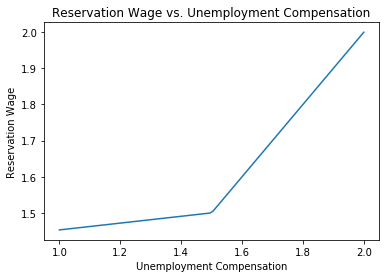

In [6]:
c_vals = np.linspace(1, 2, 100)
beta = 0.96
wvec = np.array([0.5, 1.0, 1.5])
pvec = np.array([0.2, 0.4, 0.4])

def find_wbar(c, beta, wvec, pvec):
    wbar_previous = 1
    while True:
        wbar_next = c * (1 - beta) + beta * sum(np.maximum(wvec, wbar_previous) * pvec)
        if abs(wbar_previous - wbar_next) < 1e-16:
            return wbar_next
        wbar_previous = wbar_next

wbarvec = []
        
for c in c_vals:
    wbarvec.append(find_wbar(c, beta, wvec, pvec))

plt.plot(c_vals, wbarvec)
plt.title("Reservation Wage vs. Unemployment Compensation")
plt.ylabel("Reservation Wage")
plt.xlabel("Unemployment Compensation")
plt.show()

Is the reservation wage increasing or decreasing in this value?  Does that coincide with your intuition?

Reservation wage is increasing in unemployment compensation, which makes sense since the opportunity cost of working is greater so the benefit of working must increase in order for agents to be indifferent.